In [9]:
# import resources
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
from torchvision import transforms, models
import imageio
import os

In [10]:
vgg = models.vgg19(pretrained=True).features
for param in vgg.parameters():
    param.requires_grad_(False)

In [11]:
def load_image(img_path, img_size=400, shape=None):
    image = Image.open(img_path).convert('RGB')
    if max(image.size) > img_size:
        size = img_size
    else:
        size = max(image.size)
    if shape is not None:
        size = shape
    transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406),
                        (0.229, 0.224, 0.225))])
    return transform(image)[:3,:,:].unsqueeze(0)


def get_features(image, model, layers=None):
    features = list()
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if isinstance(layer, torch.nn.Conv2d):
            features.append(x)
    return features

def normalize(tensor):
    norm_img = list()
    for im in tensor:
        im /= np.max(im)
        norm_img.append(im)
    return norm_img

In [12]:
content = load_image('im_58.bmp')

In [13]:
content_features = get_features(content, vgg)
img = content_features[0]
np_img = img.numpy().squeeze()

In [14]:
for imgs in content_features:
    print(imgs.shape)

torch.Size([1, 64, 302, 420])
torch.Size([1, 64, 302, 420])
torch.Size([1, 128, 151, 210])
torch.Size([1, 128, 151, 210])
torch.Size([1, 256, 75, 105])
torch.Size([1, 256, 75, 105])
torch.Size([1, 256, 75, 105])
torch.Size([1, 256, 75, 105])
torch.Size([1, 512, 37, 52])
torch.Size([1, 512, 37, 52])
torch.Size([1, 512, 37, 52])
torch.Size([1, 512, 37, 52])
torch.Size([1, 512, 18, 26])
torch.Size([1, 512, 18, 26])
torch.Size([1, 512, 18, 26])
torch.Size([1, 512, 18, 26])


/home/ajmalrasi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/ajmalrasi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


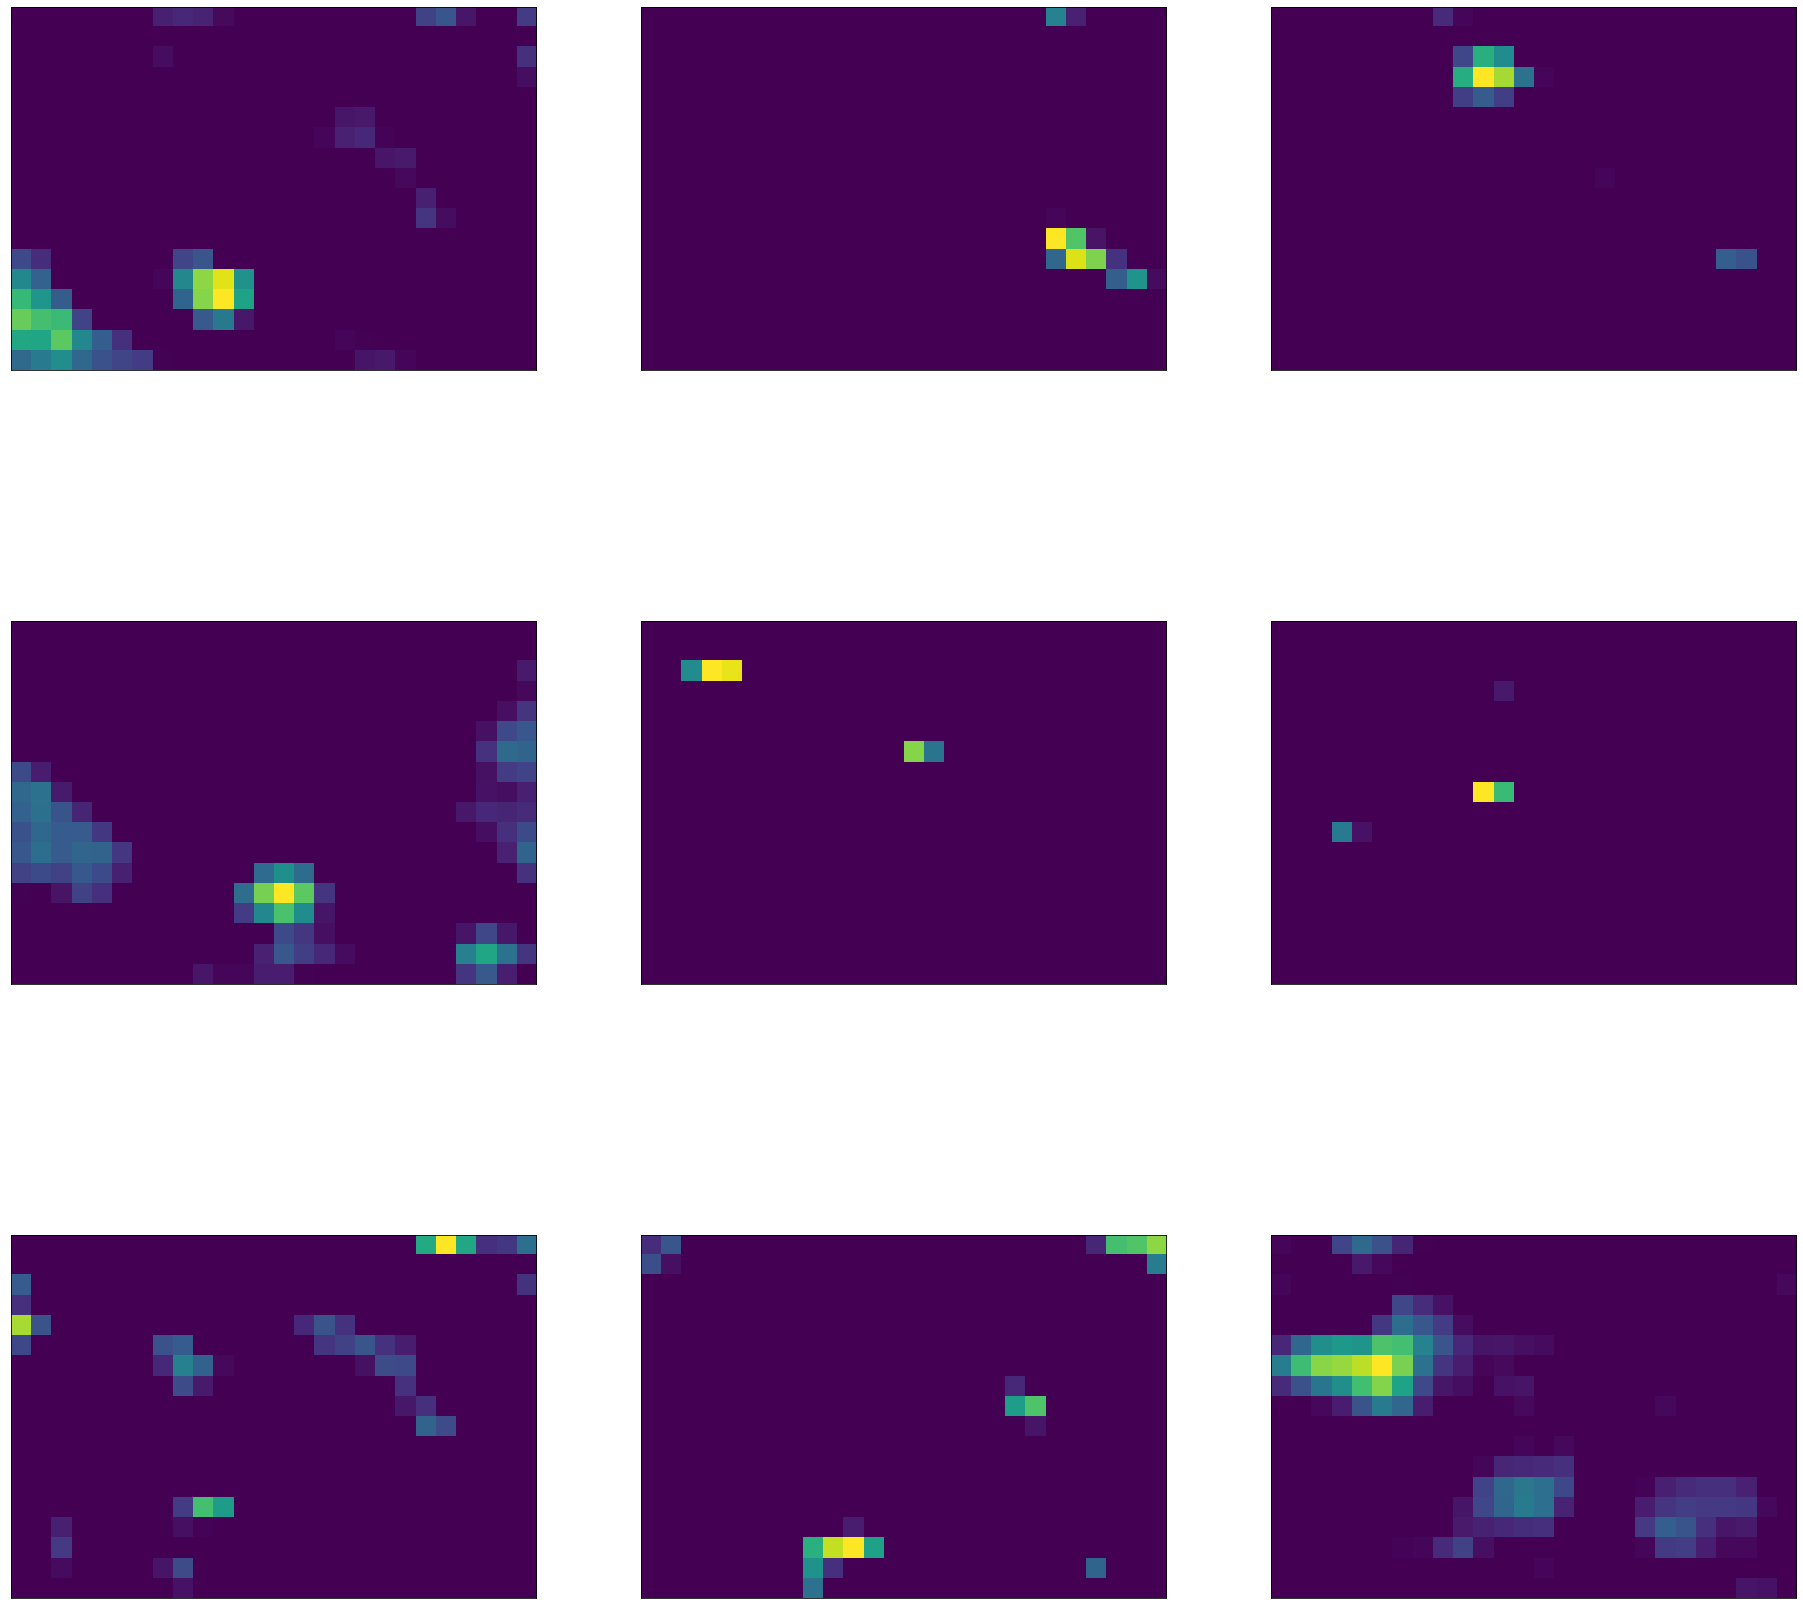

In [15]:
fig=plt.figure(figsize=(32, 32))
columns = 3
rows = 3
for ii, tensor in enumerate(content_features):
    np_img = tensor.numpy().squeeze()
    norm_img = normalize(np_img)
    for i in range(0, 9):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(norm_img[i])
        plt.xticks([])
        plt.yticks([])
        plt.imsave('images/'+chr(ii + 97)+'_'+str(i)+'.jpg', norm_img[i])
    fig.savefig('figs/'+str(ii)+'.jpg')
#     plt.show()

In [16]:
image_path = sorted(os.listdir('images'))
images = list()
for filename in image_path:
    img = cv2.imread(os.path.join("images",filename))
    images.append(cv2.resize(img, (600, 400)))
    
imageio.mimsave('movie.gif', images, duration=0.3)